<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Tensorflow</center></span>

<center>Inicio Rápido</center>

##   <span style="color:blue">Autores</span>

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
2. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 

##   <span style="color:blue">Diseño gráfico y Marketing digital</span>
 

1. Maria del Pilar Montenegro Reyes, pmontenegro88@gmail.com 

## <span style="color:blue">Referencias</span> 

1. Basado en los [tutoriales de Pytorch](https://pytorch.org/tutorials/)
1. [Deep learning for coders with FastAI and Pytorch](http://library.lol/main/F13E85845AE48D9FD7488FE7630A9FD3)

## <span style="color:blue">Contenido</span>

* [Introducción](#Introducción)
* [Trabajando con datos](#Trabajando-con-datos)
* [Creando modelos](#Creando-modelos)
* [Función de pérdida y optimizador](#Función-de-pérdida-y-optimizador)
* [Entrenamiento y validación](#Entrenamiento-y-validación)
* [Guardando y recuperando el modelo](#Guardando-y-recuperando-el-modelo)
* [Predicción](#Predicción)

## <span style="color:blue">Introducción</span>

En esta lección construimos nuestra primera red neuronal con Pytorch. Usamos el famoso ejemplo [fashion mnist](https://www.kaggle.com/zalando-research/fashionmnist). En este caso tomaremos los datos directamente de la librería `torchvision`.

### Instalar Tensorflow

En consola ejecute el siguiente comando. 

In [ ]:
#conda install -c conda-forge tensorflow

## <span style="color:blue">Carga libreías requeridas</span>

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import InputLayer

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10

import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelBinarizer

## <span style="color:blue">Trabajando con los datos</span>

In [32]:
# Carga el dataset CIFAR-10 
print("Cargando el dataset CIFAR-10...")
((x_train, y_train), (x_test, y_test)) = cifar10.load_data()
print('¡¡Hecho!!')

assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

# Escala los datos al rango [0, 1]
trainX = x_train.astype("float32") / 255.0
testX = x_test.astype("float32") / 255.0

# convierte las etiquetas de enteros a vectores (no necesario en realidad)
lb = LabelBinarizer()
trainY = lb.fit_transform(y_train)
testY = lb.transform(y_test)

rows = x_train.shape[1]
cols = x_train.shape[2]
channels = x_train.shape[3]

Cargando el dataset CIFAR-10...
¡¡Hecho!!


In [30]:
print(len(trainY))
print(testY[0])

50000
[0 0 0 1 0 0 0 0 0 0]


### Una primera imagen de los datos

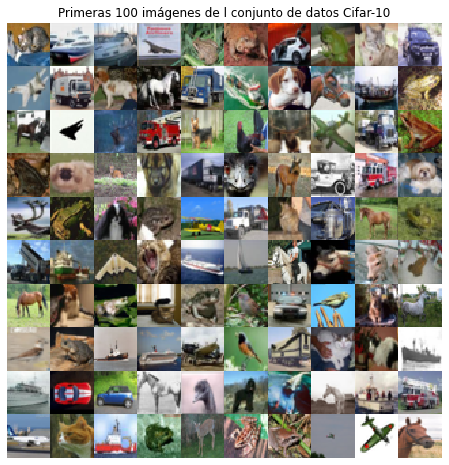

In [35]:
# Muestra las primeras 100  images en color

img_rows = rows
img_cols = cols

imgs_t = x_test[:100]
imgs_t = imgs_t.reshape((10, 10, img_rows, img_cols, channels))
imgs_t = np.vstack([np.hstack(i) for i in imgs_t])
plt.figure(figsize=(8,8))
plt.axis('off')
plt.title('Primeras 100 imágenes de l conjunto de datos Cifar-10')
plt.imshow(imgs_t, interpolation='none')
plt.savefig('./test_color.png')
plt.show()

## <span style="color:blue">Creando modelos</span>

In [ ]:
# import the necessary packages
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate

In [43]:
# define model
class NeuralNetwork(Model):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        #self.flatten = Flatten()
        self.linear_relu_stack = Sequential([
            InputLayer(input_shape=(32,32,3)),
            Flatten(),
            Dense(512, activation='relu'),
            Dense(512, activation='relu'),
            Dense(10, activation='softmax'),            
        ])
                  
    # la función call es la que define la estructura de la red
    # en este ejemplo aceptamos solo una entrada, pero si lo desea,
    # siéntete libre de usar más
    def call(self, x):
        #x = self.flatten(x)
        probs = self.linear_relu_stack(x)
        return probs

model = NeuralNetwork()


### Optimizador, métricas y compilación del modelo

In [45]:
init_lr = 1e-2
batch_size = 64
epochs = 60

optimizer = SGD(learning_rate=init_lr, momentum=0.9, decay=INIT_LR / NUM_EPOCHS)

model.compile(loss="categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])


### Entrenamiento

In [46]:
hist =  model.fit(trainX, trainY, batch_size=batch_size, 
                  validation_data=(testX, testY),
                  steps_per_epoch=trainX.shape[0] // BATCH_SIZE,
                  epochs=epochs, verbose=1)

Epoch 1/60
390/390 [==============================] - 15s 34ms/step - loss: 1.9053 - accuracy: 0.3091 - val_loss: 1.8107 - val_accuracy: 0.3466
Epoch 2/60
390/390 [==============================] - 13s 33ms/step - loss: 1.7319 - accuracy: 0.3793 - val_loss: 1.6490 - val_accuracy: 0.4175
Epoch 3/60
390/390 [==============================] - 13s 33ms/step - loss: 1.6466 - accuracy: 0.4104 - val_loss: 1.6891 - val_accuracy: 0.3887
Epoch 4/60
390/390 [==============================] - 13s 32ms/step - loss: 1.5997 - accuracy: 0.4275 - val_loss: 1.5343 - val_accuracy: 0.4539
Epoch 5/60
390/390 [==============================] - 13s 33ms/step - loss: 1.5471 - accuracy: 0.4496 - val_loss: 1.5030 - val_accuracy: 0.4654
Epoch 6/60
390/390 [==============================] - 14s 37ms/step - loss: 1.5248 - accuracy: 0.4536 - val_loss: 1.5729 - val_accuracy: 0.4387
Epoch 7/60
390/390 [==============================] - 13s 33ms/step - loss: 1.4697 - accuracy: 0.4776 - val_loss: 1.4886 - val_accuracy:

## <span style="color:blue">Guardando y recuperando el modelo</span>

Necesitamos instalar

In [ ]:
#!conda install -c anaconda pyyaml h5py

### Summary del modelo

In [50]:
mis_pesos = '../Checkpoints/Model_0_tf'
model.save_weights(mis_pesos)

### crea un nuevo modelo con mis pesos almacenados

In [55]:
model_1 = NeuralNetwork()
model_1.compile(loss="categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
model_1.load_weights(mis_pesos)

## <span style="color:blue">Evaluación del modelo</span>

In [53]:
# Evalua el modelo original 
loss, acc = model.evaluate(testX, testY, verbose=2)

print("Exactitud del modelo original accuracy: {:5.2f}%".format(100 * acc))

313/313 - 3s - loss: 1.3372 - accuracy: 0.5429
Exactitud del modelo original accuracy: 54.29%


In [57]:
# Evalua el modelo restaurado
loss, acc = model_1.evaluate(testX, testY, verbose=2)

print("Exactitud del modelo restaurado accuracy: {:5.2f}%".format(100 * acc))

In [58]:
predictions = model.predict(testX)

## <span style="color:blue">Predicción</span>

In [63]:
print(predictions[0])
print(np.argmax(predictions[0]))
print(testY[0])

[0.00158238 0.00123387 0.01136918 0.7323771  0.11188012 0.13627727
 0.00077896 0.00095027 0.00187401 0.00167684]
3
[0 0 0 1 0 0 0 0 0 0]


In [65]:
assert np.argmax(predictions[0]) == np.argmax(testY[0])